In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from sklearn.datasets import load_digits

import os

In [38]:
digits = load_digits()

print(digits.data[0])

img_size = 64

paper1= "./archive/archive/TRAIN/paper/"
plastic1= "./archive/archive/TRAIN/plastic/"
metal1 = "./archive/archive/TRAIN/metal/"

paper2 = "./archive/garbage_classification/images/paper/"
plastic2 = "./archive/garbage_classification/images/plastic/"
metal2 = "./archive/garbage_classification/images/metal/"

images = []

for p in range(0,386):
    s = ''
    if p<10:
        s += '00'
    elif p < 100:
        s += '0'
    image = Image.open(plastic1+s+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    image = image.convert(mode="L")
    images.append(image)

for p in range(1,353):
    image = Image.open(plastic2+"plastic"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    image = image.convert(mode="L")
    images.append(image)

for p in range(0,476):
    s = ''
    if p<10:
        s += '00'
    elif p < 100:
        s += '0'
    image = Image.open(paper1+s+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    image = image.convert(mode="L")
    images.append(image)

for p in range(1,263):
    image = Image.open(paper2+"paper"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    image = image.convert(mode="L")
    images.append(image)

for p in range(0,328):
    s = ''
    if p<10:
        s += '00'
    elif p < 100:
        s += '0'
    image = Image.open(metal1+s+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    image = image.convert(mode="L")
    images.append(image)

for p in range(1,411):
    image = Image.open(metal2+"metal"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    image = image.convert(mode="L")
    images.append(image)

X = np.empty((386+476+352+262+328+410, img_size* img_size))
index = 0
for pl in images:
    # Normalize pixel values
    pixels = asarray(pl)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    X[index] = np.array(pl).reshape(img_size * img_size)
    index += 1
# for ul in train_glass:
#     X[index] = np.array(ul).reshape(img_size* img_size)
#     index += 1    
#c = np.zeros(403)
pl = np.zeros(386+352) #868
pap = np.ones(476+262) #1070
m = np.empty(328+410) #738
m.fill(2)
# p = np.empty(476)
# p.fill(2)
y = np.concatenate((pl, pap, m), axis=0).reshape(X.shape[0], 1)

print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[209. 206. 205. ... 138. 138. 139.]


<Figure size 432x288 with 0 Axes>

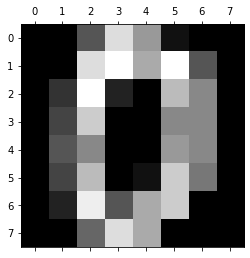

In [7]:
plt.gray()
plt.matshow(digits.images[0])

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(X_train[0])

print(len(X_train2))
print(len(X_test2))
print(X_train2[0])

1437
360
[ 0.  0.  3. 14.  1.  0.  0.  0.  0.  0. 12. 12.  0.  0.  0.  0.  0.  3.
 16.  6.  0.  0.  0.  0.  0.  5. 16.  2.  0.  0.  0.  0.  0.  6. 16.  2.
  5.  2.  0.  0.  0.  4. 16.  2. 12. 15.  2.  0.  0.  1. 14. 13.  2. 13.
 11.  0.  0.  0.  3. 11. 16. 13.  4.  0.]
1771
443
[210. 206. 205. ... 183. 183. 186.]


In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

model.fit(X_train2, y_train2)

print(model.score(X_test2, y_test2))

/Users/eduardo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eduardo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9722222222222222
0.835214446952596


/Users/eduardo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
